# PROJECT 1: BLOG POST

Question1 : What characteristics have a person that decides to save for retirement?

Question2 : What are the ways they take to save for retirement?

Question3 : What is the main reason they do not choose a Pension Scheme?

Data source : “Encuesta Nacional de Demanda de Servicios Financieros y Nivel de Cultura
Financiera en el Perú” of 2016 provided by Superintendencia de Banca y Seguros (SBS)


## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [64]:
#read the data base
df = pd.read_stata('Base de datos.dta', convert_categoricals=False)

## Cleaning of variables

- Save: (Dichotomic variable) People who save money are the ones who answered in the question “p55” the options
from 1 to 6; people who do not save, 7 and 8.
- Age: (Numeric variable) Question “p3”.
- levelEducation: (Ordered variable) Question “p8”. Level of education reached
- maritalStatus: (Categorical variable) Question “p4”.
- Sex: (Dichotomic variable) Question “p2”. Men were assigned “0” and Women, “1”.
- Income: (Ordered variable) Question “p27”. It is divided in ranges
- NumMembersAtHome: (Numeric Variable). Question “p5”. Number of people who live in the
household.
- TypeSavings: (Categorical variable) Question "p25". Ways of saving for retirement
- noPensionSch: (Categorical variable) Question "p56". Reason people do not choose pension schemes.

In [65]:
#'save' variable
#create 'save' first as a series full of nan
df['save'] = pd.Series(np.nan, index = df.index)

#then assign the values of the questions of type 'p55_'
df['save'] = np.where((df['p55_1']== 1) | (df['p55_2']== 1) | (df['p55_3']== 1) | (df['p55_4']== 1) | (df['p55_5']== 1) | (df['p55_6']== 1), 1, df['save'])
df['save'] = np.where((df['p55_7']== 1) | (df['p55_8']== 1), 0, df['save'])


In [66]:
#what is the perecentage of nan values in the variable of interest?
df['save'].isnull().mean()

0.0009516256938937351

In [67]:
#drop na from the variable of interest due to small amount of nan values
df.dropna(subset=['save'], axis = 0, how = 'any', inplace = True)

In [68]:
#rename the columns
df.rename(columns = {'p3':'age', 'p8':'levelEducation', 'p4':'maritalStatus', 'p2':'sex', 'p27':'income', 'p5':'numMembersAtHome'}, inplace = True)

#create another df to anwer the 2nd and 3rd question. 
#Question 1 will have another way to treat nan values because the second and third question could be answered separately
#from what is found in the first one, so in order to not loose nan values for those last two questions, another data frame was created
df2 = df.copy()

#subset the data
df = df[['save', 'age', 'levelEducation', 'maritalStatus', 'sex', 'income', 'numMembersAtHome']]

#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 0 to 6304
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   save              6299 non-null   float64
 1   age               6299 non-null   float64
 2   levelEducation    6299 non-null   float64
 3   maritalStatus     6282 non-null   float64
 4   sex               6299 non-null   float64
 5   income            4544 non-null   float64
 6   numMembersAtHome  6298 non-null   float64
dtypes: float64(7)
memory usage: 393.7 KB


In [69]:
#check the values
df.describe()

,save,age,levelEducation,maritalStatus,sex,income,numMembersAtHome
count,6299.000000,6299.000000,6299.000000,6282.000000,6299.000000,4544.000000,6298.000000
mean,0.420702,41.785839,5.760438,1.890003,0.583902,2.625660,4.255954
std,0.493711,14.554625,2.285494,0.545201,0.492949,1.554233,1.999659
min,0.000000,-8.000000,1.000000,1.000000,0.000000,-8.000000,-8.000000
25%,0.000000,30.000000,4.000000,2.000000,0.000000,1.000000,3.000000
50%,0.000000,41.000000,6.000000,2.000000,1.000000,2.000000,4.000000
75%,1.000000,53.000000,7.000000,2.000000,1.000000,4.000000,5.000000
max,1.000000,70.000000,11.000000,3.000000,1.000000,6.000000,20.000000


There exist answers '-8.0' in reference to Nan values. They have to be replaced

In [70]:
#replace '-8.0' with nan
for i in df:
    df[i] = np.where(df[i] == -8, np.nan, df[i])

In [71]:
#check the proportion of nan values in each variable
df.isnull().mean()

save                0.000000
age                 0.000635
levelEducation      0.000000
maritalStatus       0.002699
sex                 0.000000
income              0.279727
numMembersAtHome    0.001270
dtype: float64

Due to the fact that the proportion of nan values is relatively low, it will be better to drop nan values. The sample will be reduced in just 27% aprox. Another way to deal with nan values is to replace them with the mean or the mode (in case of categorical values).

In [72]:
#drop nan values
df.dropna(axis=0, how ='any', inplace=True)


In [73]:
df.describe()

,save,age,levelEducation,maritalStatus,sex,income,numMembersAtHome
count,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.492471,42.749779,5.891497,1.901683,0.479628,2.642161,4.180027
std,0.499999,13.892446,2.317579,0.556119,0.499640,1.498891,1.961232
min,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,32.000000,4.000000,2.000000,0.000000,1.000000,3.000000
50%,0.000000,42.000000,6.000000,2.000000,0.000000,2.000000,4.000000
75%,1.000000,53.000000,8.000000,2.000000,1.000000,4.000000,5.000000
max,1.000000,70.000000,11.000000,3.000000,1.000000,6.000000,19.000000


In [74]:
#change the type of each variable
df = df.astype({'save':'uint8', 'age':'int64', 'levelEducation':'str', 'maritalStatus':'str', 'sex':'uint8', 'income':'str', 'numMembersAtHome':'int64'}, errors='ignore')

In [75]:
df

,save,age,levelEducation,maritalStatus,sex,income,numMembersAtHome
0,1,33,3.0,2.0,1,1.0,3
2,0,53,6.0,2.0,1,1.0,3
3,1,35,4.0,1.0,0,2.0,5
5,1,40,1.0,2.0,1,2.0,3
6,1,34,6.0,2.0,0,3.0,4
...,...,...,...,...,...,...,...
6300,1,34,10.0,2.0,1,4.0,2
6301,1,65,10.0,3.0,0,1.0,8
6302,1,30,10.0,2.0,1,6.0,4
6303,1,54,11.0,2.0,0,6.0,4


In [76]:
#Labeling the values of variables
df['save'] = df['save'].replace([0.0, 1.0], ['no', 'yes'])

#change the variable save to categorical
df['save'] = pd.Categorical(df['save'], categories=['no', 'yes'], ordered=True)

#Labeling the values of variables
df['levelEducation'] = df['levelEducation'].replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0'], \
                                          ['noEducation', 'kindergarten','incompletePrimary', 'completePrimary', 'incompleteSecondary',\
                                          'completeSecondary', 'incompleteTechnical', 'completeTechnical', 'incompleteUniversity',\
                                          'completeUniversity', 'Postgrade'])
df['maritalStatus'] = df['maritalStatus'].replace(['1.0', '2.0', '3.0'], ['single', 'married', 'divorced'])
df['sex'] = df['sex'].replace([0.0, 1.0], ['male', 'female'])
df['income'] = df['income'].replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'], ['<400', '<400,750>', '<750,1022>', '<1022,1500>', '<1500,2100>', '>2100'])

## I. What are the main factors of the decision of saving for retirement?

### Level of Education

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

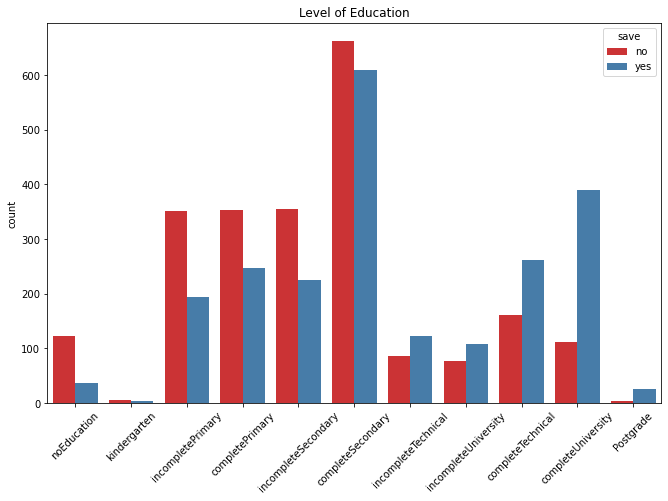

In [77]:
#Level of education
#transform it to categorical and give it order
df['levelEducation'] = pd.Categorical(df['levelEducation'], categories = ['noEducation', 'kindergarten','incompletePrimary', 'completePrimary', 'incompleteSecondary',\
                                          'completeSecondary', 'incompleteTechnical', 'incompleteUniversity','completeTechnical', \
                                          'completeUniversity', 'Postgrade'], ordered = True)
#graph
plt.figure(figsize=(11,7))
sns.countplot(x='levelEducation',hue='save',data=df,palette='Set1')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Level of Education')
plt.xlabel('')
plt.tight_layout

Is higher the level of education reached, higher is the proportion of people who save for retirement

In [78]:
from scipy import stats

In [79]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["levelEducation"])
stats.chi2_contingency(crosstab)

(350.58339700360074,
 2.996286224606275e-69,
 10,
 array([[ 80.69707706,   4.56775908, 276.60318866, 305.02480071,
         294.87422498, 646.08414526, 106.07351639,  94.4003543 ,
         215.19220549, 254.27192205,  14.21080602],
        [ 78.30292294,   4.43224092, 268.39681134, 295.97519929,
         286.12577502, 626.91585474, 102.92648361,  91.5996457 ,
         208.80779451, 246.72807795,  13.78919398]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Marital Status

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

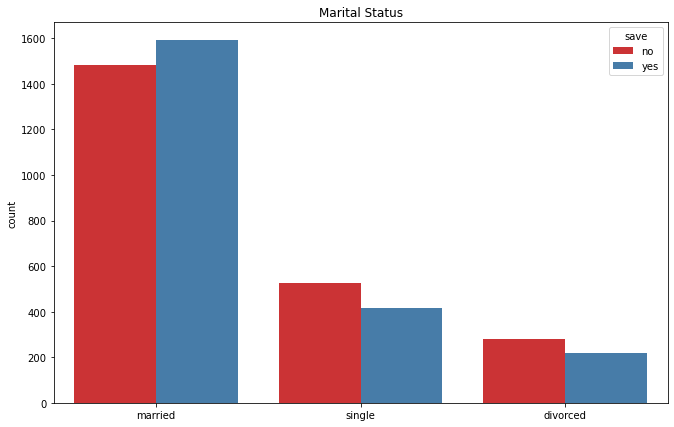

In [80]:
#graph
plt.figure(figsize=(11,7))
sns.countplot(x='maritalStatus',hue='save',data=df,palette='Set1')
plt.title('Marital Status')
plt.xlabel('')
plt.tight_layout

Divorced and single people have a lower proportion of saving for retirement

In [81]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["maritalStatus"])
stats.chi2_contingency(crosstab)

(23.65933917031431,
 7.285171441087505e-06,
 2,
 array([[ 252.7493357 , 1561.15854739,  478.09211692],
        [ 245.2506643 , 1514.84145261,  463.90788308]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Sex

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

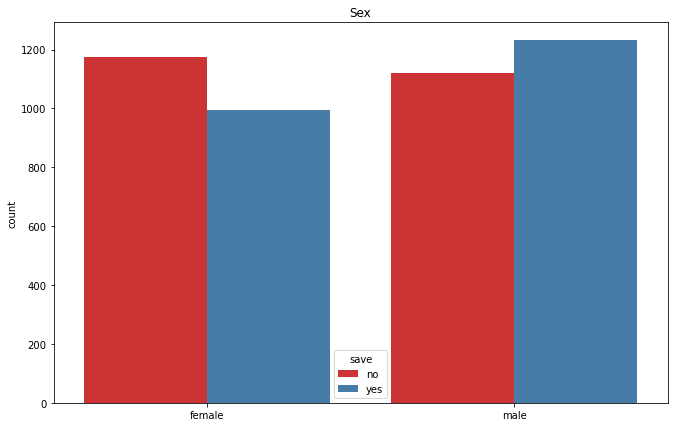

In [82]:
#graph
plt.figure(figsize=(11,7))
sns.countplot(x='sex',hue='save',data=df,palette='Set1')
plt.title('Sex')
plt.xlabel('')
plt.tight_layout

Males have a higher proportion of saving for retirement

In [83]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["sex"])
stats.chi2_contingency(crosstab)

(19.016080727857254,
 1.2962145808954675e-05,
 1,
 array([[1099.30735164, 1192.69264836],
        [1066.69264836, 1157.30735164]]))

X2 test of independence give a pvalue<0.001; therefore, it could be affirmed that there exist a relationship between this two variables

### Income

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

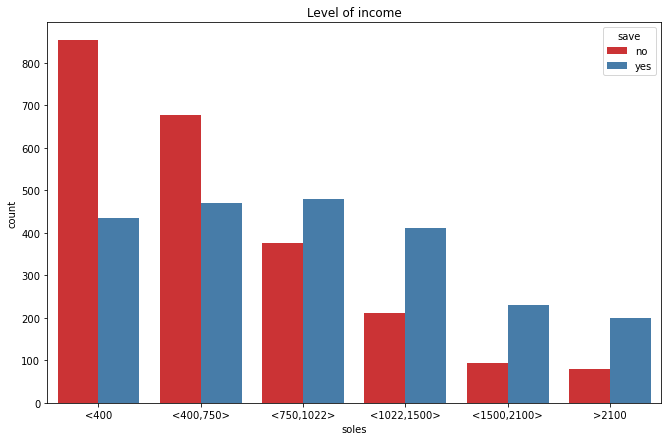

In [84]:
#Income
#transform it to categorical and give it order
df['income'] = pd.Categorical(df['income'], categories = ['<400', '<400,750>', '<750,1022>', '<1022,1500>', '<1500,2100>', '>2100'] , ordered = True)

#graph
plt.figure(figsize=(11,7))
sns.countplot(x='income',hue='save',data=df,palette='Set1')
plt.title('Level of income')
plt.xlabel('soles')
plt.tight_layout

Clearly, people who earn more than 750 soles per month have a higher proportion of saving for retirement

In [85]:
#chi square of independence
crosstab = pd.crosstab(df["save"], df["income"])
stats.chi2_contingency(crosstab)

(358.21990255086877,
 2.973116188738553e-75,
 5,
 array([[653.18954827, 582.64304694, 434.44464128, 316.19043401,
         163.93179805, 141.60053144],
        [633.81045173, 565.35695306, 421.55535872, 306.80956599,
         159.06820195, 137.39946856]]))

X2 test of independence give a pvalue<0.001, therefore it could be affirmed that there exist a relationship between this two variables

### Age

Text(0, 0.5, 'years')

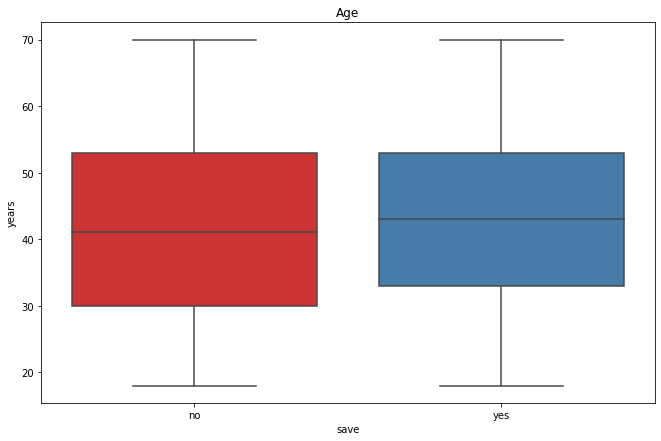

In [86]:
#graph
plt.figure(figsize=(11,7))
sns.boxplot(x='save', y = 'age', data = df, palette = 'Set1')
plt.title('Age')
plt.ylabel('years')

The medians of both groups, people who save and not save, are very close; though the group of people who save has a higher median

### Number of members at home

<AxesSubplot:xlabel='save', ylabel='numMembersAtHome'>

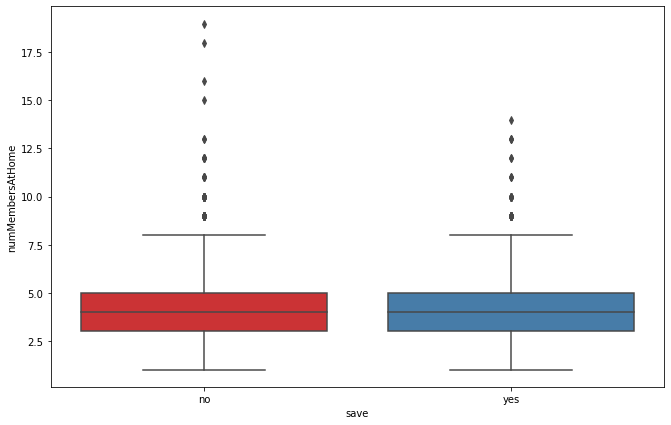

In [87]:
#number of members at home
plt.figure(figsize=(11,7))
sns.boxplot(x='save', y = 'numMembersAtHome', data = df, palette = 'Set1')

The distributions of both groups are very similar. Also, there are several outliers that should be trated carefully. This variable will not be explained in the blog for simplicity. 

The graph analysis and the chi square tests of independence show that the main demographic factors of saving for retirement are sex, income, marital status and education. With the variables numbers of members at home and age could be applied, in a further research, an univariate logistic regression to know if the effect of those variable are statistically significant in the decision of saving.
Males with higher income, married and higher level of education responded in a higher proportion that they save for retirement. These characteristics corresponds mainly to a person who is working probably in a dependent job with an obliged pension scheme; therefore, the next step to take is to deep, for the people who save, in the ways that they choose to save.



## II : What are the ways they take to save for retirement?

In [88]:
#type of savings
#Create a variable that unites the answers of questions of type 'p55_'.
#First create the variable full of nan, in order to not loose the values that could be nan
df2['typeSaving'] = pd.Series(np.nan, index = df2.index)

#then assign the values
df2['typeSaving'] = np.where((df2['p55_1']== 1), 'pensionScheme', df2['typeSaving'])
df2['typeSaving'] = np.where((df2['p55_2']== 1), 'financialInst', df2['typeSaving'])
df2['typeSaving'] = np.where((df2['p55_3']== 1), 'lifeInsurance', df2['typeSaving'])
df2['typeSaving'] = np.where((df2['p55_4']== 1), 'byHisOwn', df2['typeSaving'])
df2['typeSaving'] = np.where((df2['p55_5']== 1), 'InvestmentRents', df2['typeSaving'])
df2['typeSaving'] = np.where((df2['p55_6']== 1), 'kidsEducation', df2['typeSaving'])


In [89]:
df2['typeSaving'].value_counts(sort=True, ascending = True)

lifeInsurance        46
financialInst       173
InvestmentRents     354
kidsEducation       653
byHisOwn            710
pensionScheme       746
nan                3617
Name: typeSaving, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

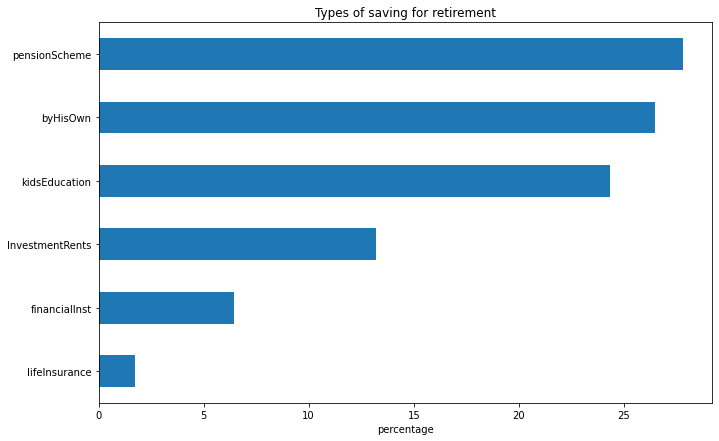

In [90]:
#graph
plt.figure(figsize=(11,7))

#assign 'nan' a np.nan value
df2['typeSaving'] = np.where(df2['typeSaving'] == 'nan', np.nan, df2['typeSaving'])

#drop na that are the people who do not save
((df2['typeSaving'].value_counts(sort=True, ascending = True)/(len(df2['typeSaving'].dropna(axis = 0, how = 'any'))))*100).plot.barh()
plt.title('Types of saving for retirement')
plt.xlabel('percentage')
plt.tight_layout

If a person is working dependently is obliged to enter to the pension scheme, but if not someone could also enter freely. The graph shows that the pension scheme is the most common way they have to save for retirement. However, the option 'ByHisOwn' is the one that follows in the list, as well as 'KidsEducation'. This means that most of the people (more than 50%) have an alternative way of saving out of the financial sector; therefore, these two last options are risky and distrustful ways of saving. 

## III: What is the main reason they do not choose a pension scheme?

In [91]:
df2['p56'].value_counts(sort = True)

 2.0     1513
 8.0      813
 5.0      789
 3.0      489
 1.0      463
 7.0      428
 6.0      317
 4.0      228
 10.0     169
 9.0      134
-8.0        1
Name: p56, dtype: int64

In [92]:
#replace values
df2['noPensionSch'] = df2['p56'].replace({1.0: 'noTrust', 2.0:'noMoney', 3.0:'noNeed', 4.0:'frozenMoney', 5.0:'noKnowledge', 6.0:'noAccess', 7.0:'seemsComplicated', 8.0:'noJob', 9.0: 'other', 10.0:'freelancer',-8.0:np.nan})

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

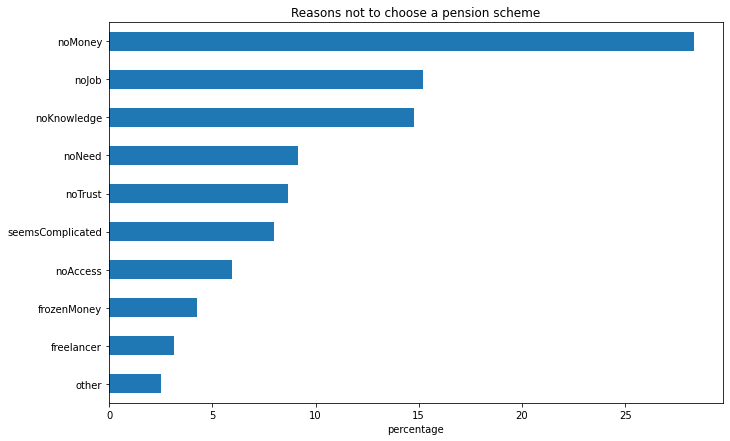

In [93]:
#graph
plt.figure(figsize=(11,7))
(df2['noPensionSch'].value_counts(sort = True, ascending = True)/len(df2['noPensionSch'].dropna(axis = 0, how = 'any'))*100).plot.barh()
plt.title('Reasons not to choose a pension scheme')
plt.xlabel('percentage')
plt.tight_layout

In [94]:
df2['noPensionSch'].value_counts(sort = True, ascending = False)/len(df2['noPensionSch'].dropna(axis = 0, how = 'any'))*100

noMoney             28.317425
noJob               15.216171
noKnowledge         14.766985
noNeed               9.152162
noTrust              8.665544
seemsComplicated     8.010481
noAccess             5.932996
frozenMoney          4.267266
freelancer           3.163017
other                2.507954
Name: noPensionSch, dtype: float64

By far, people do not use pension Scheme due to the lack of money (28%) or job(15%) or lack of Knowledge (14.7%)